# Introduction to Neural Language Models

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

## Recap of probability chains in language

In [2]:
import json
from nltk import word_tokenize

In [3]:
raw_data = '/Users/flint/Data/recipe/recipe1M_layers/layer1.json'
with open(raw_data, 'r') as raw_data_file:
    rdata = json.load(raw_data_file)

In [4]:
tokenizer = lambda x: ['[sos]'] + word_tokenize(x.lower()) + ['[eos]']
recipe2text = lambda x: " ".join(
    ['[start]'] + 
    [" ".join(tokenizer(y['text'])) for y in rdata[x]['instructions']] + 
    ['[stop]'])

In [5]:
corpus = [recipe2text(i) for i in range(10**4)]

### A different overview of n-gram models

In [6]:
import networkx as nx
from nltk import ngrams

In [7]:
def text2graph(recipes, n=2):
    g = nx.DiGraph()
    for recipe in recipes:
        r = recipe.split()
        for ngram in ngrams(r, n=n, pad_left=True, left_pad_symbol='[pad]'):
            n1, n2 = " ".join(ngram[:-1]), " ".join(ngram[1:])
            g.add_edge(n1, n2)
    return g

In [8]:
graphs = dict([(n, text2graph(corpus[:1000], n=n)) for n in range(2, 20)])

In [9]:
stats = []
for n, g in graphs.items():
    stats.append({
        'n': n, 'nodes': len(g.nodes()), 'edges': len(g.edges())
    })
S = pd.DataFrame(stats)

In [10]:
S.head()

,n,nodes,edges
0,2,4768,35476
1,3,35477,75038
2,4,75039,101503
3,5,101504,121850
4,6,121851,135165


In [11]:
import matplotlib.pyplot as plt

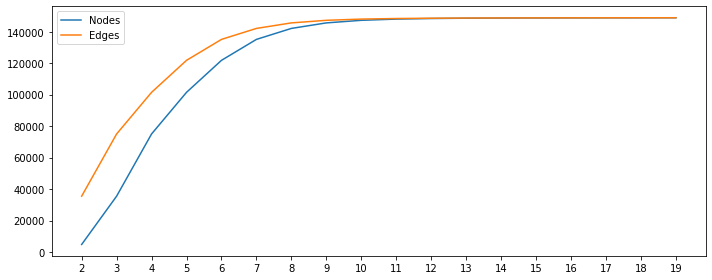

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(S.nodes.values, label='Nodes')
ax.plot(S.edges.values, label='Edges')
ax.set_xticks(range(len(S.n.values)))
ax.set_xticklabels(S.n.values)
ax.legend()
plt.tight_layout()
plt.show()